# Reading KML

## Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [1]:
try:
    import geopandas
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        !apt install libspatialindex-dev -qq
        !pip install fiona shapely pyproj rtree --quiet
        !pip install geopandas --quiet
    else:
        print('geopandas not found, please install via conda in your environment')

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_amd64.deb ...
Unpacking libspatialindex4v5:amd64 (1.8.5-5) ...
Selecting previously unselected package libspatialindex-c4v5:amd64.
Preparing to unpack .../libspatialindex-c4v5_1.8.5-5_amd64.deb ...
Unpacking libspatialindex-c4v5:amd64 (1.8.5-5) ...
Selecting previously unselected package libspatialindex-d

In [9]:
import os
import pandas as pd
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import fiona
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'


In [5]:
file_path = 'BGL_Rangareddy.kml'
layers = pd.Series(fiona.listlayers(file_path))
layers[0]

'Text [7193A]'

In [13]:
from tqdm import tqdm


In [16]:
gdf_list = []

for index, layer in tqdm(layers.items()):
      gdf = gpd.read_file(file_path, layer=layer)
      gdf_list.append(gdf)
      

2182it [08:48,  4.13it/s]


In [18]:
merged = pd.concat(gdf_list)
merged

,Name,Description,geometry
0,B2-461,,POINT Z (78.50425 17.68199 0.00000)
0,Point [71939]:0,"<table> <tr> <td align=""right"">Generic Propert...","MULTILINESTRING Z ((78.50424 17.68198 0.00000,..."
0,B2-460,,POINT Z (78.49496 17.68535 0.00000)
0,Point [71936]:0,"<table> <tr> <td align=""right"">Generic Propert...","MULTILINESTRING Z ((78.49496 17.68535 0.00000,..."
0,B2-459,,POINT Z (78.49141 17.69321 0.00000)
...,...,...,...
3,"Marino Foods Pvt Limited, Biscuit Plant, Raja ...",,POINT Z (78.54023 17.63764 0.00000)
4,Real Agro Pvt Ltd Factory,,POINT Z (78.54321 17.63946 0.00000)
5,Sumo Biscuits Pvt Ltd,,POINT Z (78.50614 17.62196 0.00000)
6,Muvao Naturals,,POINT Z (78.52109 17.63342 0.00000)


In [23]:
output_file = 'merged.gpkg'

In [24]:
for geomtype in merged.geom_type.unique():
   merged[merged.geom_type == geomtype].to_file(output_file, driver="GPKG", layer=geomtype)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/spatialthoughts/python-tutorials/raw/main/data/' +
         'Bars_and_pubs__with_patron_capacity.csv')
download('https://github.com/spatialthoughts/python-tutorials/raw/main/data/' +
         'metro_stations_accessbility.zip')

## Procedure

Read the `Bars_and_pubs__with_patron_capacity.csv` file and convert it to a GeoDataFrame.

In [ ]:
csv_file = 'Bars_and_pubs__with_patron_capacity.csv'
csv_path = os.path.join(data_folder, csv_file)
barspubs_df = pd.read_csv(csv_path) 
barspubs_df

,Census year,Block ID,Property ID,Base property ID,Street address,CLUE small area,Trading name,Number of patrons,x coordinate,y coordinate,Location
0,2002,247,106238,106238,192-202 Lygon Street,Carlton,Players On Lygon,200,144.967052,-37.802459,"(-37.80245924, 144.9670522)"
1,2002,252,106244,106244,160-162 Lygon Street,Carlton,Bar Centrale,500,144.966770,-37.803442,"(-37.80344164, 144.9667699)"
2,2006,16,104018,104018,172-192 Flinders Street,Melbourne (CBD),Purple Emerald,110,144.968543,-37.816639,"(-37.81663851, 144.9685429)"
3,2002,214,106186,106186,414-422 Lygon Street,Carlton,Percys Bar & Bistro,120,144.967813,-37.796946,"(-37.79694555, 144.9678126)"
4,2008,76,589841,105749,221 Little Lonsdale Street,Melbourne (CBD),JWow Bar,100,144.965703,-37.810658,"(-37.810658, 144.9657034)"
...,...,...,...,...,...,...,...,...,...,...,...
3333,2017,85,105746,105746,183-265 La Trobe Street,Melbourne (CBD),Equinox Bar Restaurant,80,144.963019,-37.810733,"(-37.81073331, 144.9630189)"
3334,2017,74,104662,104662,106-112 Hardware Street,Melbourne (CBD),Nieuw Amsterdam,200,144.960680,-37.812136,"(-37.81213605, 144.9606805)"
3335,2017,268,108154,108153,49 Rathdowne Street,Carlton,Epocha Restaurant,124,144.968594,-37.805787,"(-37.80578725, 144.9685944)"
3336,2017,104,104085,104085,167-175 Franklin Street,Melbourne (CBD),Disco Bar,200,144.959154,-37.808960,"(-37.80895967, 144.9591538)"


You will note that the data contains multiple features for each establishment from different years. Let's sort by *Property ID* and check.

In [ ]:
barspubs_df = barspubs_df.sort_values('Property ID')
barspubs_df

,Census year,Block ID,Property ID,Base property ID,Street address,CLUE small area,Trading name,Number of patrons,x coordinate,y coordinate,Location
3129,2017,103,100160,100160,196-200 A'Beckett Street,Melbourne (CBD),Nomads Industry Backpackers,200,144.957445,-37.809985,"(-37.80998494, 144.9574447)"
709,2011,103,100160,100160,196-200 A'Beckett Street,Melbourne (CBD),Nomads Industry Backpackers,200,144.957445,-37.809985,"(-37.80998494, 144.9574447)"
2553,2015,103,100160,100160,196-200 A'Beckett Street,Melbourne (CBD),Nomads Industry Backpackers,200,144.957445,-37.809985,"(-37.80998494, 144.9574447)"
247,2008,103,100160,100160,196-200 A'Beckett Street,Melbourne (CBD),Nomads Industry Backpackers,200,144.957445,-37.809985,"(-37.80998494, 144.9574447)"
2201,2010,103,100160,100160,196-200 A'Beckett Street,Melbourne (CBD),Nomads Industry Backpackers,200,144.957445,-37.809985,"(-37.80998494, 144.9574447)"
...,...,...,...,...,...,...,...,...,...,...,...
2579,2015,1105,628712,628712,717-731 Collins Street,Docklands,Bar Nicional,75,144.950093,-37.820687,"(-37.82068699, 144.9500934)"
2832,2016,66,635138,635138,13 Heffernan Lane,Melbourne (CBD),Union Electric,72,144.966591,-37.811802,"(-37.81180178, 144.9665913)"
3069,2017,66,635138,635138,13 Heffernan Lane,Melbourne (CBD),Union Electric,72,144.966591,-37.811802,"(-37.81180178, 144.9665913)"
3058,2016,270,664626,104468,230 Grattan Street,Parkville,HJC Bar,200,144.961247,-37.797398,"(-37.79739836, 144.9612468)"


We are interested only in the location of the establishment. So we can de-duplicate the dataframe and keep only 1 record per unique *Property ID*.

In [ ]:
barspubs_df = barspubs_df.drop_duplicates(subset=['Property ID'], keep='first')
barspubs_df

,Census year,Block ID,Property ID,Base property ID,Street address,CLUE small area,Trading name,Number of patrons,x coordinate,y coordinate,Location
3129,2017,103,100160,100160,196-200 A'Beckett Street,Melbourne (CBD),Nomads Industry Backpackers,200,144.957445,-37.809985,"(-37.80998494, 144.9574447)"
1087,2011,409,100441,100441,118-126 Ireland Street,West Melbourne (Residential),Railway Hotel,241,144.942118,-37.806054,"(-37.80605366, 144.9421177)"
410,2004,315,100514,100514,204-206 Arden Street,North Melbourne,North Melbourne Football Club Social Club,210,144.941312,-37.799055,"(-37.79905531, 144.9413118)"
1501,2009,33,100727,100727,5-9 Bank Place,Melbourne (CBD),Mitre Tavern,300,144.960311,-37.816805,"(-37.81680457, 144.9603112)"
1159,2013,33,100730,100730,12-16 Bank Place,Melbourne (CBD),Melbourne Savage Club,90,144.960577,-37.816545,"(-37.81654467, 144.9605765)"
...,...,...,...,...,...,...,...,...,...,...,...
1601,2009,2391,616966,616966,2 Boundary Road,North Melbourne,Vodka Locka & Red Leaf Restaurant,40,144.939233,-37.795318,"(-37.79531826, 144.9392333)"
1182,2013,1110,620312,593737,23-37 Star Crescent,Docklands,Harbour Town Hotel,498,144.937830,-37.813150,"(-37.81315031, 144.9378299)"
3028,2016,1105,628712,628712,717-731 Collins Street,Docklands,Bar Nicional,75,144.950093,-37.820687,"(-37.82068699, 144.9500934)"
2832,2016,66,635138,635138,13 Heffernan Lane,Melbourne (CBD),Union Electric,72,144.966591,-37.811802,"(-37.81180178, 144.9665913)"


Now that we are done with data cleaning, let's turn this dataframe in to a spatial layer. The location of the establishment is defined using the *x coordinate* and *y coordinate* columns. Create a geometry column and use it to define a new GeoDataFrame.

In [ ]:
geometry=gpd.points_from_xy(barspubs_df['x coordinate'],barspubs_df['y coordinate'])
barspubs_gdf = gpd.GeoDataFrame(barspubs_df, crs='EPSG:4326', geometry=geometry)
barspubs_gdf

,Census year,Block ID,Property ID,Base property ID,Street address,CLUE small area,Trading name,Number of patrons,x coordinate,y coordinate,Location,geometry
3129,2017,103,100160,100160,196-200 A'Beckett Street,Melbourne (CBD),Nomads Industry Backpackers,200,144.957445,-37.809985,"(-37.80998494, 144.9574447)",POINT (144.95744 -37.80998)
1087,2011,409,100441,100441,118-126 Ireland Street,West Melbourne (Residential),Railway Hotel,241,144.942118,-37.806054,"(-37.80605366, 144.9421177)",POINT (144.94212 -37.80605)
410,2004,315,100514,100514,204-206 Arden Street,North Melbourne,North Melbourne Football Club Social Club,210,144.941312,-37.799055,"(-37.79905531, 144.9413118)",POINT (144.94131 -37.79906)
1501,2009,33,100727,100727,5-9 Bank Place,Melbourne (CBD),Mitre Tavern,300,144.960311,-37.816805,"(-37.81680457, 144.9603112)",POINT (144.96031 -37.81680)
1159,2013,33,100730,100730,12-16 Bank Place,Melbourne (CBD),Melbourne Savage Club,90,144.960577,-37.816545,"(-37.81654467, 144.9605765)",POINT (144.96058 -37.81654)
...,...,...,...,...,...,...,...,...,...,...,...,...
1601,2009,2391,616966,616966,2 Boundary Road,North Melbourne,Vodka Locka & Red Leaf Restaurant,40,144.939233,-37.795318,"(-37.79531826, 144.9392333)",POINT (144.93923 -37.79532)
1182,2013,1110,620312,593737,23-37 Star Crescent,Docklands,Harbour Town Hotel,498,144.937830,-37.813150,"(-37.81315031, 144.9378299)",POINT (144.93783 -37.81315)
3028,2016,1105,628712,628712,717-731 Collins Street,Docklands,Bar Nicional,75,144.950093,-37.820687,"(-37.82068699, 144.9500934)",POINT (144.95009 -37.82069)
2832,2016,66,635138,635138,13 Heffernan Lane,Melbourne (CBD),Union Electric,72,144.966591,-37.811802,"(-37.81180178, 144.9665913)",POINT (144.96659 -37.81180)


Next, we will read the zipped shapefile of metro stations as a GeoDataFrame.

In [ ]:
zip_file = 'metro_stations_accessbility.zip'
zip_path = os.path.join('zip://', data_folder, zip_file)
metrostations_gdf = gpd.read_file(zip_path)
metrostations_gdf

,station,pids,he_loop,lift,geometry
0,Alamein,No,No,No,POINT (145.07956 -37.86884)
1,Albion,Dot Matrix,No,No,POINT (144.82471 -37.77766)
2,Alphington,Dot Matrix,No,No,POINT (145.03125 -37.77840)
3,Altona,LCD,No,No,POINT (144.83060 -37.86725)
4,Anstey,No,No,No,POINT (144.96056 -37.76190)
...,...,...,...,...,...
214,Williams Landing,Dot Matrix,Yes,Yes,POINT (144.74719 -37.87010)
215,Aircraft,No,No,No,POINT (144.76081 -37.86660)
216,Flemington Racecourse,No,No,No,POINT (144.90720 -37.78759)
217,Showgrounds,No,No,No,POINT (144.91498 -37.78355)


Visualize the layers.

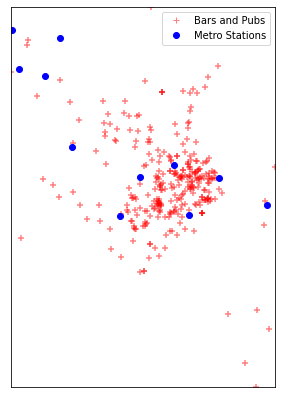

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
barspubs_gdf.plot(ax=ax, color='red', alpha=0.5, marker='+')
metrostations_gdf.plot(ax=ax, color='blue', alpha=1, marker='o')

minx, miny, maxx, maxy = barspubs_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

legend_elements = [
    plt.plot([],[], color='red', alpha=0.5, marker='+', label='Bars and Pubs', ls='')[0],
    plt.plot([],[], color='blue', alpha=1, marker='o', label='Metro Stations', ls='')[0]]
ax.legend(handles=legend_elements, loc='upper right')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

For performing any analysis, we must use a Projected CRS. Let's reproject to a local CRS for Melbourne. *GDA 2020 / MGA zone 55 EPSG:7855*.

In [ ]:
metrostations_gdf_reprojected = metrostations_gdf.to_crs('EPSG:7855')
barspubs_gdf_reprojected = barspubs_gdf.to_crs('EPSG:7855')

We now buffer the metro stations to 500 meters. GeoPandas uses shapely for buffer operation. We specify [buffer parameters](https://shapely.readthedocs.io/en/latest/manual.html#constructive-methods) to match QGIS's default style.

In [ ]:
radius = 500

buffer_geometry = metrostations_gdf_reprojected.buffer(
    radius, resolution=5, cap_style=1, join_style=1, mitre_limit=2)
metrostations_gdf_reprojected['geometry'] = buffer_geometry

Visualize the buffers.

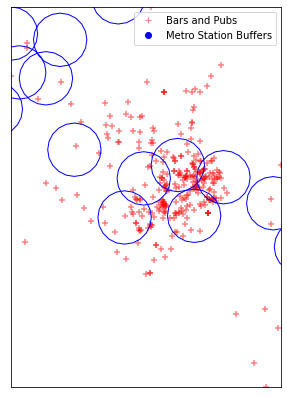

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
barspubs_gdf_reprojected.plot(ax=ax, color='red', alpha=0.5, marker='+')
metrostations_gdf_reprojected.plot(ax=ax, facecolor='none', edgecolor='blue',  alpha=1, marker='o')

minx, miny, maxx, maxy = barspubs_gdf_reprojected.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

legend_elements = [
    plt.plot([],[], color='red', alpha=0.5, marker='+', label='Bars and Pubs', ls='')[0],
    plt.plot([],[], color='blue', alpha=1, marker='o', label='Metro Station Buffers', ls='')[0]]
ax.legend(handles=legend_elements, loc='upper right')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

As we want to do a spatial join, we need to dissolve the resulting buffers. Otherwise we will get 1 feature for every intersecting buffer

In [ ]:
metrostations_gdf_reprojected['dissolvefield'] = 1
dissolved_buffers = metrostations_gdf_reprojected.dissolve(by='dissolvefield')

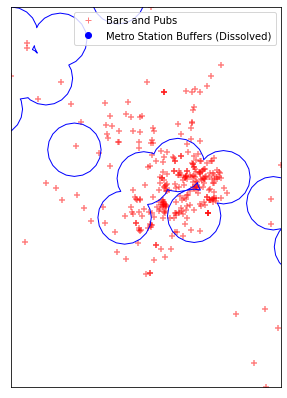

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
barspubs_gdf_reprojected.plot(ax=ax, color='red', alpha=0.5, marker='+')
dissolved_buffers.plot(ax=ax, facecolor='none', edgecolor='blue',  alpha=1, marker='o')

minx, miny, maxx, maxy = barspubs_gdf_reprojected.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

legend_elements = [
    plt.plot([],[], color='red', alpha=0.5, marker='+', label='Bars and Pubs', ls='')[0],
    plt.plot([],[], color='blue', alpha=1, marker='o', label='Metro Station Buffers (Dissolved)', ls='')[0]]
ax.legend(handles=legend_elements, loc='upper right')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

Now do a spatial join to select all bars and pubs within the dissolved buffer region.

In [ ]:
selected = gpd.sjoin(barspubs_gdf_reprojected, dissolved_buffers, how='inner', predicate='within')
selected

,Census year,Block ID,Property ID,Base property ID,Street address,CLUE small area,Trading name,Number of patrons,x coordinate,y coordinate,Location,geometry,index_right,station,pids,he_loop,lift
3129,2017,103,100160,100160,196-200 A'Beckett Street,Melbourne (CBD),Nomads Industry Backpackers,200,144.957445,-37.809985,"(-37.80998494, 144.9574447)",POINT (320198.313 5813303.450),1,Alamein,No,No,No
1087,2011,409,100441,100441,118-126 Ireland Street,West Melbourne (Residential),Railway Hotel,241,144.942118,-37.806054,"(-37.80605366, 144.9421177)",POINT (318839.353 5813710.077),1,Alamein,No,No,No
3274,2017,508,100820,100820,38-44 Barrett Street,Kensington,Henry St Brewhouse,75,144.934324,-37.798112,"(-37.79811158, 144.9343238)",POINT (318133.676 5814576.239),1,Alamein,No,No,No
2929,2016,87,101023,101023,25 Bennetts Lane,Melbourne (CBD),Bennetts Lane Jazz Club,300,144.967558,-37.808892,"(-37.80889245, 144.967558)",POINT (321086.023 5813444.098),1,Alamein,No,No,No
2689,2005,14,101099,101099,16-26 Bond Street,Melbourne (CBD),Bond Lounge,500,144.963057,-37.818146,"(-37.81814578, 144.9630575)",POINT (320712.196 5812408.662),1,Alamein,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2009,2530,616125,616125,25-27 Rankins Road,Kensington,Flemington & Kensington RSL Club,90,144.932195,-37.789322,"(-37.78932218, 144.9321953)",POINT (317924.677 5815547.421),1,Alamein,No,No,No
1750,2012,2530,616160,616160,265-271 Racecourse Road,Kensington,The Quiet Man Irish Pub,400,144.932356,-37.788610,"(-37.78860982, 144.9323559)",POINT (317937.071 5815626.782),1,Alamein,No,No,No
1601,2009,2391,616966,616966,2 Boundary Road,North Melbourne,Vodka Locka & Red Leaf Restaurant,40,144.939233,-37.795318,"(-37.79531826, 144.9392333)",POINT (318559.131 5814895.748),1,Alamein,No,No,No
3028,2016,1105,628712,628712,717-731 Collins Street,Docklands,Bar Nicional,75,144.950093,-37.820687,"(-37.82068699, 144.9500934)",POINT (319577.184 5812101.707),1,Alamein,No,No,No


For our final visualization, we show the selected establishments within the buffer zone.

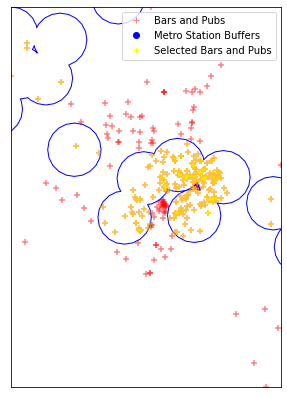

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
barspubs_gdf_reprojected.plot(ax=ax, color='red', alpha=0.5, marker='+')
dissolved_buffers.plot(ax=ax, facecolor='none', edgecolor='blue',  alpha=1, marker='o')
selected.plot(ax=ax, color='yellow', alpha=0.5, marker='+')

minx, miny, maxx, maxy = barspubs_gdf_reprojected.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

legend_elements = [
    plt.plot([],[], color='red', alpha=0.5, marker='+', label='Bars and Pubs', ls='')[0],
    plt.plot([],[], color='blue', alpha=1, marker='o', label='Metro Station Buffers', ls='')[0],
    plt.plot([],[], color='yellow', alpha=1, marker='+', label='Selected Bars and Pubs', ls='')[0]
]

ax.legend(handles=legend_elements, loc='upper right')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

Finally, we save all our layers into a output geopackage.

In [ ]:
output_folder = 'output'
output_file = 'spatial_query.gpkg'
output_path = os.path.join(output_folder, output_file)

barspubs_gdf_reprojected.to_file(driver='GPKG', filename=output_path, layer='bars_and_pubs')
metrostations_gdf_reprojected.to_file(driver='GPKG', filename=output_path, layer='metro_stations')
selected.to_file(driver='GPKG', filename=output_path, layer='selected_locations')